In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def sigmoid(z):
    return 1 / (1+ exp(-z))

In [3]:
def h(X, w):
    return sigmoid(X.dot(w))
def cost(X, w, y):
    m = X.shape[0]
    tmp = y * log(h(X, w)) + (1 - y) * log(1 - h(X, w))
    return -(1 / m) * sum(tmp)
def grad(X, w, y):
    return -(y - h(X, w)).dot(X)
def genData(cnt):
    X1 = np.c_[np.random.normal(1, 0.5, (cnt, )), np.random.normal(1, 0.5, (cnt, )), np.ones(cnt)]
    X2 = np.c_[np.random.normal(-1, 0.5, (cnt, )), np.random.normal(-1, 0.5, (cnt, )), np.ones(cnt)]
    y1 = np.ones(cnt)
    y2 = np.zeros(cnt)
    return X1, y1, X2, y2
def predict(X, w):
    res = h(X, w)
    res[res>=0.5] = 1
    res[res<0.5] = 0
    return res

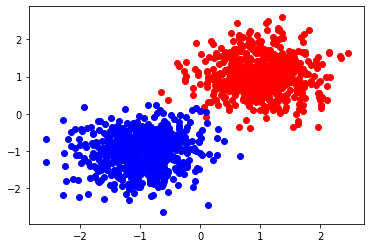

In [4]:
X1, y1, X2, y2 = genData(600)
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.scatter(X2[:, 0], X2[:, 1], c='b')

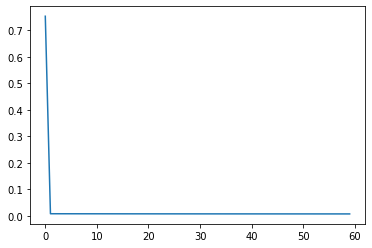

In [5]:
loop = 60
a = 0.01
w = randn(3)
costs = np.zeros(loop)
for i in range(loop):
    costs[i] = cost(X, w, y)
    g = grad(X, w, y)
    w -= a * g
plot(costs)

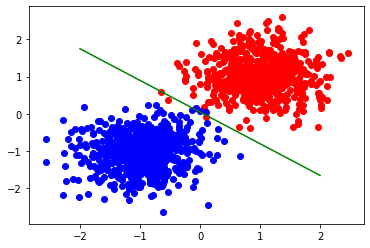

In [6]:
k = -(w[0] / w[1])
b = -(w[2] / w[1])
xx = linspace(-2, 2)
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.scatter(X2[:, 0], X2[:, 1], c='b')
plt.plot(xx, k * xx + b, c='g')

In [7]:
err_cnt = sum(abs(y - predict(X, w)))
print("训练错误数： ", err_cnt)
print("训练错误率：", err_cnt / loop)

训练错误数：  6.0
训练错误率： 0.1


In [8]:
test_cnt = 1000
X1, y1, X2, y2 = genData(test_cnt)
testX = np.r_[X1, X2]
testy = np.r_[y1, y2]
err_cnt = sum(abs(testy - predict(testX, w)))
print("测试错误数： ", err_cnt)
print("测试错误率：", err_cnt / test_cnt)

测试错误数：  4.0
测试错误率： 0.004
